In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
sns.set_palette("coolwarm")

In [2]:
path = kagglehub.dataset_download("dskagglemt/student-performance-data-set")
path

'C:\\Users\\sathv\\.cache\\kagglehub\\datasets\\dskagglemt\\student-performance-data-set\\versions\\1'

In [3]:
df = pd.read_csv(os.path.join(path, "student-mat.csv"), sep=';').merge(pd.read_csv(os.path.join(path, "student-por.csv"), sep=';'), how='outer')
# df.head()
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [33]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [36]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
is_cat = []
for line in open(os.path.join(path, "student.txt"), "r").readlines():
    if line[0].isdigit():
        feature = line.split()[1]
        ftps = ['binary', 'nominal', 'numeric']
        ftp = ftps[np.argmax(list(map(lambda x: line.find(x), ftps)))]
        if ftp != "numeric":
            is_cat.append(feature)
            dummies = pd.get_dummies(df[feature], prefix=feature).astype(int)
            df = pd.concat([df, dummies], axis=1)
            for f in dummies.columns:
                is_cat.append(f)

is_cat

['school',
 'school_GP',
 'school_MS',
 'sex',
 'sex_F',
 'sex_M',
 'address',
 'address_R',
 'address_U',
 'famsize',
 'famsize_GT3',
 'famsize_LE3',
 'Pstatus',
 'Pstatus_A',
 'Pstatus_T',
 'Mjob',
 'Mjob_at_home',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason',
 'reason_course',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian',
 'guardian_father',
 'guardian_mother',
 'guardian_other',
 'schoolsup',
 'schoolsup_no',
 'schoolsup_yes',
 'famsup',
 'famsup_no',
 'famsup_yes',
 'paid',
 'paid_no',
 'paid_yes',
 'activities',
 'activities_no',
 'activities_yes',
 'nursery',
 'nursery_no',
 'nursery_yes',
 'higher',
 'higher_no',
 'higher_yes',
 'internet',
 'internet_no',
 'internet_yes',
 'romantic',
 'romantic_no',
 'romantic_yes']

In [74]:
len(df.loc[:, ~df.columns.str.contains("_")].columns)

33

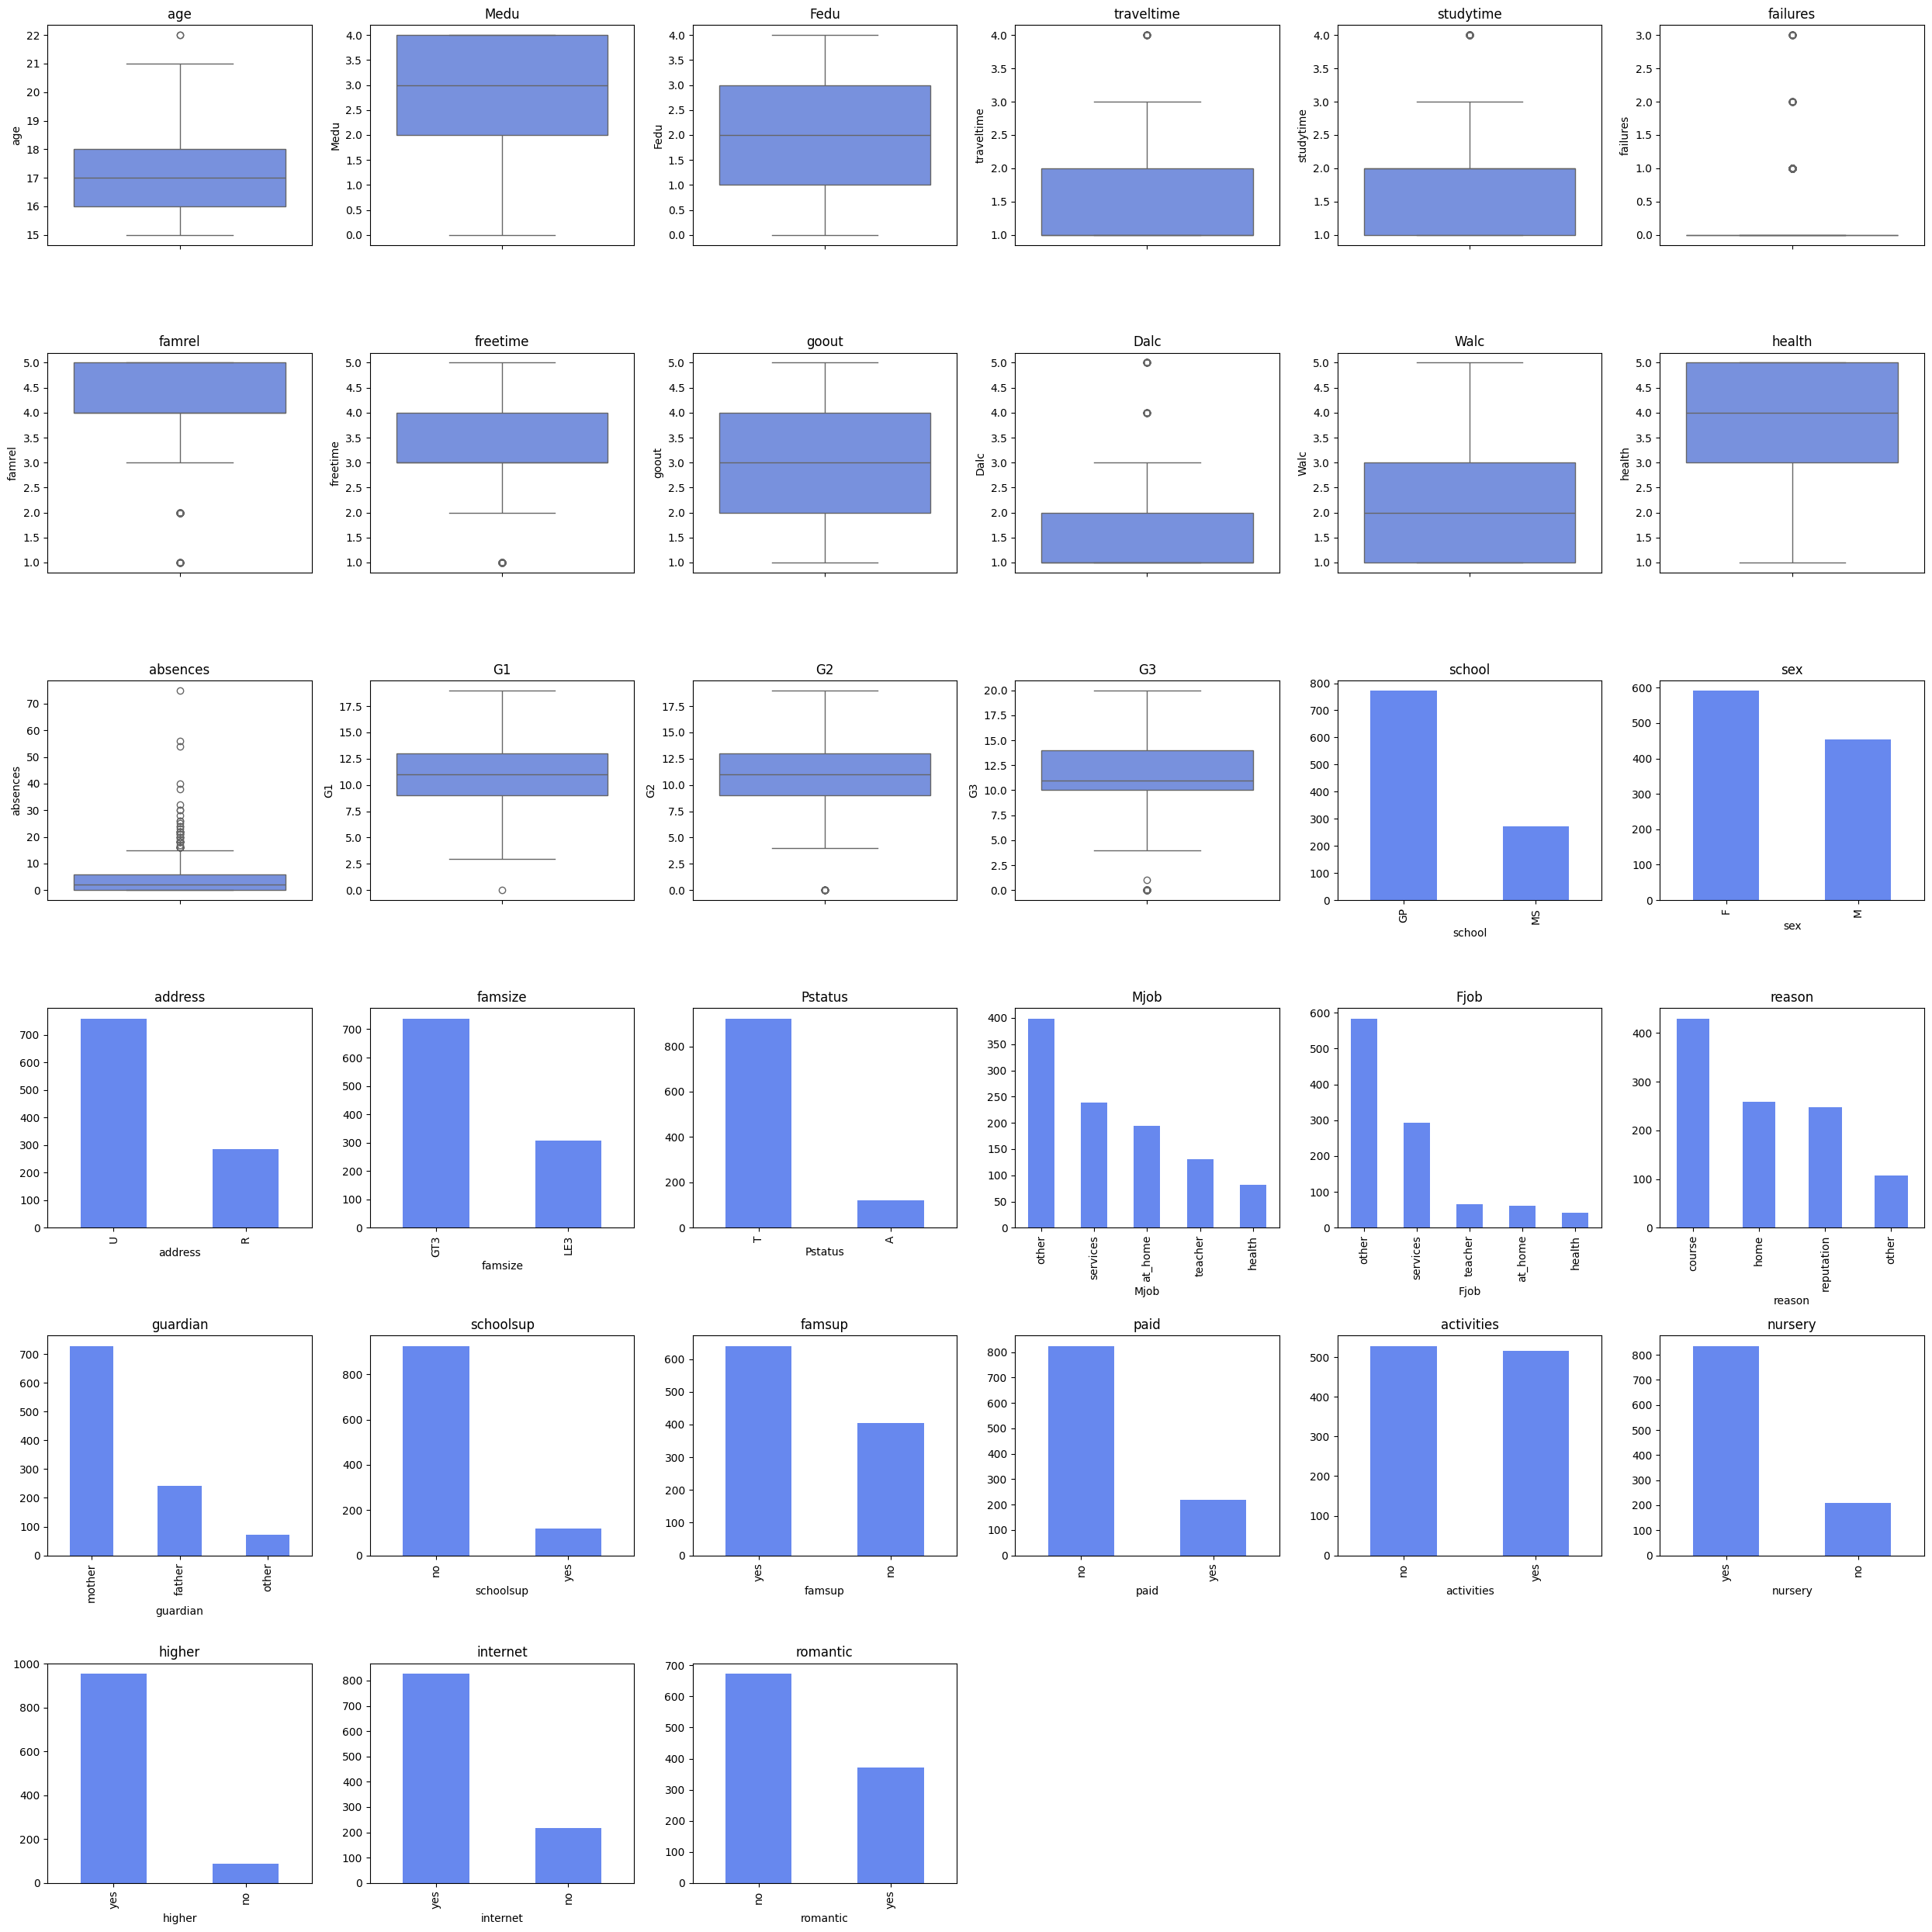

In [78]:
plt.figure(figsize=(25, 25))
for idx, col in enumerate(df.loc[:, ~df.columns.str.contains("_")].select_dtypes(exclude=["object"]).columns, start=1):
    plt.subplot(6, 6, idx)
    sns.boxplot(data=df[col])
    plt.title(col)
for idx, col in enumerate(df.select_dtypes(include=["object"]).columns, start=17):
    plt.subplot(6, 6, idx)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    
plt.tight_layout()

In [83]:
print(f"Failures Skew: {df['failures'].skew()}")
print(f"Failures Kurtosis: {df['failures'].kurt()}")
print(f"Absences Skew: {df['absences'].skew()}")
print(f"Absences Kurtosis: {df['absences'].kurt()}")

Failures Skew: 2.7836603404866307
Failures Kurtosis: 7.495350355000851
Absences Skew: 3.74134660105707
Absences Kurtosis: 26.596200301025277


<Axes: >

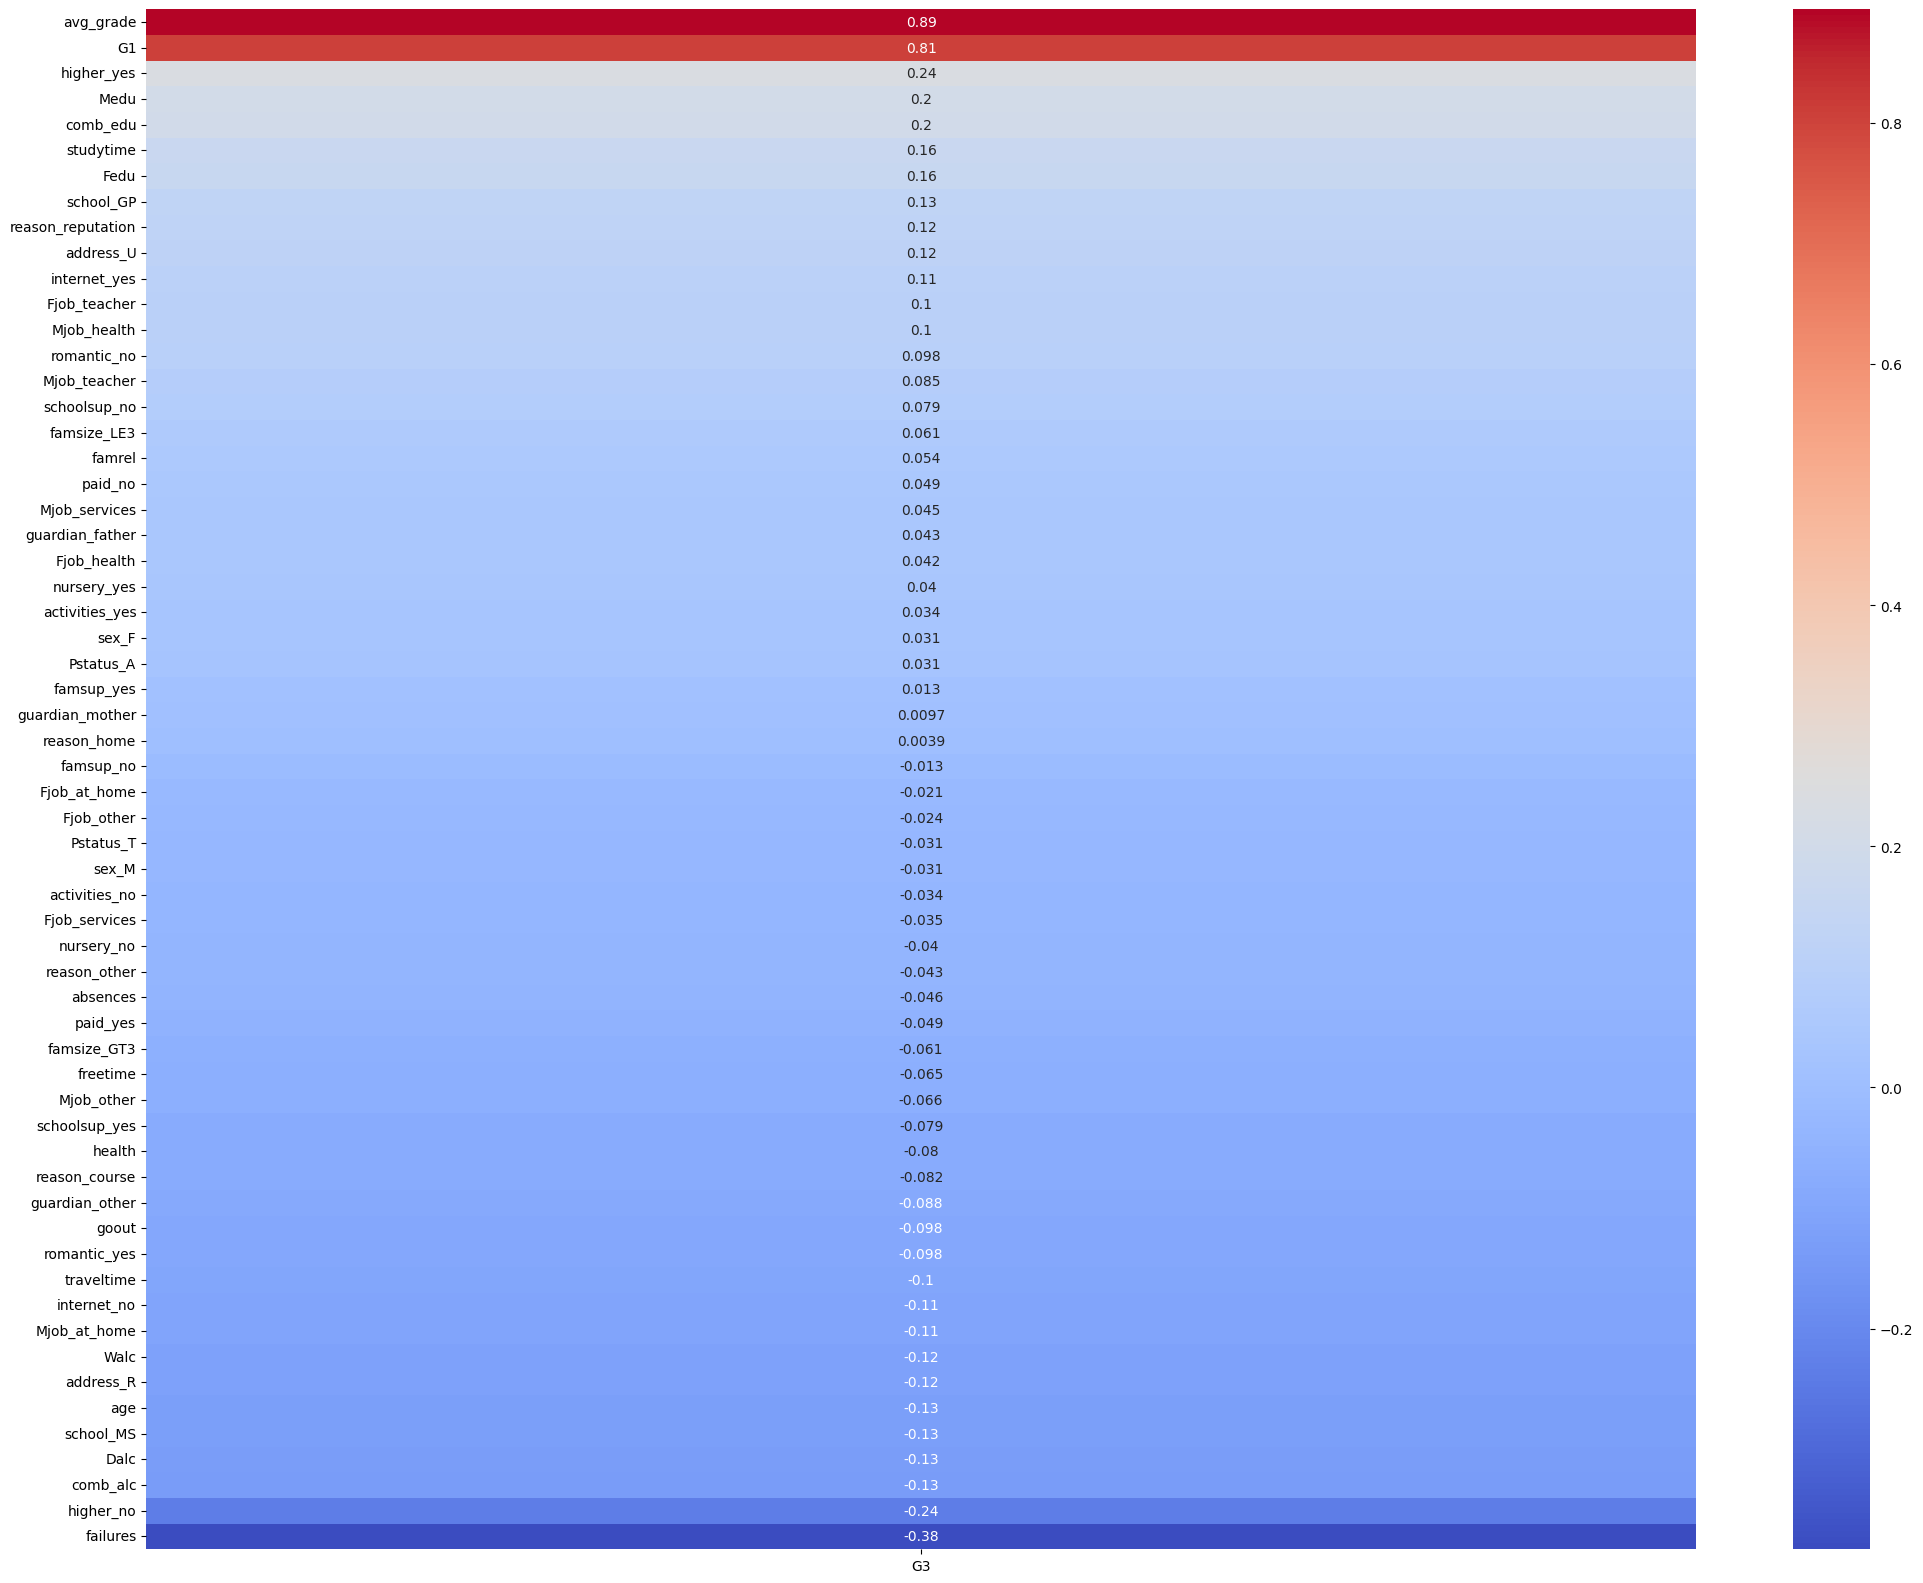

In [7]:
corr_matrix = df.select_dtypes(exclude=["object"]).corr()['G3'].sort_values(ascending=False).iloc[2:].to_frame()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [5]:
df['comb_edu'] = df['Medu'] + df['Fedu']
df['comb_alc'] = df['Dalc'] + df['Walc']
# df['goout+romantic-studytime'] = df['goout'] + df['romantic_encoded'] - df['studytime']
df['avg_grade'] = (df['G1'] + df['G2'])/2
# for cat in ['comb_edu', "comb_alc", "goout+romantic-studytime"]:
#     del df[cat]

In [6]:
df['social'] = (df['goout'] + df['romantic_yes'])/df['studytime']
df['avg_grade'] = (df['G1'] + df['G2']) / 2
df['failures_plus_higher_no'] = df['failures'] + df['higher_no']
# df.corr()['failures'].apply(abs).sort_values(ascending=False).to_dict()

In [92]:
from sklearn.feature_selection import SelectKBest, f_regression 

selector = SelectKBest(score_func=f_regression, k=4)
possible = df.select_dtypes(exclude=['object']).drop(columns=["G1", "G2", "G3", "failures", "higher_yes"])
selector.fit_transform(possible, df['G3'])
selected = possible.columns[selector.get_support()]
possible.columns.value_counts()

age                  1
Medu                 1
Fedu                 1
traveltime           1
studytime            1
famrel               1
freetime             1
goout                1
Dalc                 1
Walc                 1
health               1
absences             1
school_GP            1
school_MS            1
sex_F                1
sex_M                1
address_R            1
address_U            1
famsize_GT3          1
famsize_LE3          1
Pstatus_A            1
Pstatus_T            1
Mjob_at_home         1
Mjob_health          1
Mjob_other           1
Mjob_services        1
Mjob_teacher         1
Fjob_at_home         1
Fjob_health          1
Fjob_other           1
Fjob_services        1
Fjob_teacher         1
reason_course        1
reason_home          1
reason_other         1
reason_reputation    1
guardian_father      1
guardian_mother      1
guardian_other       1
schoolsup_no         1
schoolsup_yes        1
famsup_no            1
famsup_yes           1
paid_no    

In [18]:
features = ['failures_plus_higher_no', 'avg_grade']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['G3'], test_size=0.3)#, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((730, 2), (314, 2), (730,), (314,))

In [30]:
from xgboost import XGBRegressor

model2 = XGBRegressor()
model2.fit(X_train, y_train)
pred = np.around(model2.predict(X_test))
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print(f"MSE: {mean_squared_error(y_test, pred)}")
print(f"R2: {r2_score(y_test, pred)}")
df_comp

MSE: 2.9426751136779785
R2: 0.8029600381851196


,Actual,Predicted
947,8,7.0
647,13,12.0
10,10,10.0
578,14,16.0
527,16,15.0
...,...,...
100,13,13.0
524,11,12.0
757,11,10.0
373,8,8.0


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = np.around(model.predict(X_test))
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print(f"MSE: {mean_squared_error(y_test, pred)}")
print(f"R2: {r2_score(y_test, pred)}")
df_comp

MSE: 2.9012738853503186
R2: 0.8057322613046216


,Actual,Predicted
947,8,8.0
647,13,12.0
10,10,10.0
578,14,16.0
527,16,14.0
...,...,...
100,13,13.0
524,11,12.0
757,11,9.0
373,8,8.0


In [25]:
intercept = model.intercept_
coefficients = model.coef_


print(model.coef_.astype(float))
print(" : ".join(features))

[-0.15642123  1.1424843 ]
failures_plus_higher_no : avg_grade


In [27]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']

In [482]:
model2 = joblib.load("model.pkl")

<Axes: >

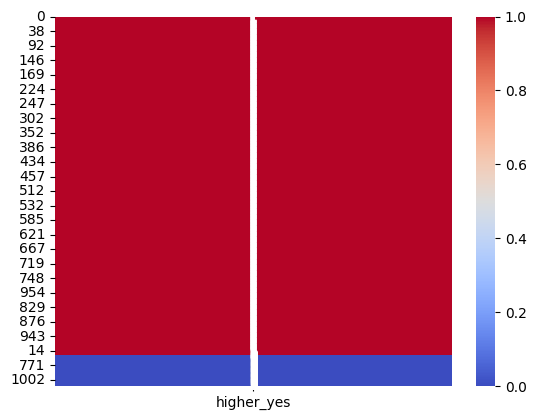

In [726]:
sns.heatmap(df['higher_yes'].sort_values(ascending=False).iloc[1:].to_frame(), annot=True, cmap='coolwarm')

In [8]:
df.to_csv("df.csv")